<a href="https://colab.research.google.com/github/Bonom0/smartphone-project/blob/main/Projeto_Ciencia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ============================
# World Smartphone Market 2025
# Data Science + ML (Clustering)
# Colab-ready
# ============================

# 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Configs de plot
sns.set(style="whitegrid")
%matplotlib inline

# Criar pasta de figuras
os.makedirs("/content/figs", exist_ok=True)

In [2]:
# 2) Upload do arquivo (explorador) e leitura
from google.colab import files
uploaded = files.upload()  # selecione o CSV baixado do Kaggle

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Arquivo:", filename)
print("Shape:", df.shape)
print("Colunas:", df.columns.tolist())
df.head()

Saving Global_Mobile_Prices_2025_Extended.csv to Global_Mobile_Prices_2025_Extended.csv
Arquivo: Global_Mobile_Prices_2025_Extended.csv
Shape: (1000, 15)
Colunas: ['brand', 'model', 'price_usd', 'ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 'display_size_inch', 'charging_watt', '5g_support', 'os', 'processor', 'rating', 'release_month', 'year']


,brand,model,price_usd,ram_gb,storage_gb,camera_mp,battery_mah,display_size_inch,charging_watt,5g_support,os,processor,rating,release_month,year
0,Oppo,A98 111,855,16,128,108,6000,6.6,33,Yes,Android,Helio G99,3.8,February,2025
1,Realme,11 Pro+ 843,618,6,128,64,4500,6.9,100,Yes,Android,Tensor G4,4.4,August,2025
2,Xiaomi,Redmi Note 14 Pro 461,258,16,64,64,4000,6.8,44,Yes,Android,A18 Pro,4.1,March,2025
3,Vivo,V29e 744,837,6,512,48,4500,6.0,65,Yes,Android,Exynos 2400,4.1,August,2025
4,Apple,iPhone 16 Pro Max 927,335,12,128,200,5000,6.9,100,Yes,iOS,Dimensity 9300,3.5,February,2025


In [3]:
# 3) EDA rápida
# Info e estatísticas básicas
df.info()
display(df.describe(include='all').T)

# Missing values
print("\nMissing per column:")
print(df.isna().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              1000 non-null   object 
 1   model              1000 non-null   object 
 2   price_usd          1000 non-null   int64  
 3   ram_gb             1000 non-null   int64  
 4   storage_gb         1000 non-null   int64  
 5   camera_mp          1000 non-null   int64  
 6   battery_mah        1000 non-null   int64  
 7   display_size_inch  1000 non-null   float64
 8   charging_watt      1000 non-null   int64  
 9   5g_support         1000 non-null   object 
 10  os                 1000 non-null   object 
 11  processor          1000 non-null   object 
 12  rating             1000 non-null   float64
 13  release_month      1000 non-null   object 
 14  year               1000 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 117.3+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand,1000,9,Vivo,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,1000,992,Narzo 70 451,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price_usd,1000.0,NaN,NaN,NaN,813.478,411.708367,101.0,449.25,822.0,1166.25,1499.0
ram_gb,1000.0,NaN,NaN,NaN,9.172,4.32633,4.0,6.0,8.0,12.0,16.0
storage_gb,1000.0,NaN,NaN,NaN,402.88,349.405893,64.0,128.0,256.0,512.0,1024.0
camera_mp,1000.0,NaN,NaN,NaN,83.534,62.504958,12.0,48.0,64.0,108.0,200.0
battery_mah,1000.0,NaN,NaN,NaN,5012.0,711.591429,4000.0,4500.0,5000.0,5500.0,6000.0
display_size_inch,1000.0,NaN,NaN,NaN,6.3806,0.496841,5.5,6.0,6.4,6.8,7.2
charging_watt,1000.0,NaN,NaN,NaN,63.791,36.333751,18.0,33.0,65.0,100.0,120.0
5g_support,1000,2,Yes,503,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Missing per column:
brand                0
model                0
price_usd            0
ram_gb               0
storage_gb           0
camera_mp            0
battery_mah          0
display_size_inch    0
charging_watt        0
5g_support           0
os                   0
processor            0
rating               0
release_month        0
year                 0
dtype: int64


In [4]:
# 4) Limpeza e pré-processamento (usando APENAS colunas existentes)
# Observação: adaptar se houver formatos estranhos

# Renomear coluna '5g_support' para evitar acesso por atributo (opcional)
if '5g_support' in df.columns:
    df.rename(columns={'5g_support': 'support_5g'}, inplace=True)

# Converter support_5g para numérico (se for 'Yes'/'No' ou True/False)
if 'support_5g' in df.columns:
    # detecta possíveis formatos
    df['support_5g'] = df['support_5g'].replace({True:1, False:0, 'Yes':1, 'No':0, 'yes':1, 'no':0})
    df['support_5g'] = pd.to_numeric(df['support_5g'], errors='coerce')

# Preencher missing para numéricos com mediana (robusto)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Excluir possíveis IDs ou colunas não desejadas — aqui não temos
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Preencher strings faltantes
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
df[obj_cols] = df[obj_cols].fillna('Desconhecido')

# Criar variáveis de engenharia (usando só colunas existentes)
df['price_per_ram'] = df['price_usd'] / (df['ram_gb'].replace(0, np.nan))
df['price_per_ram'].fillna(df['price_per_ram'].median(), inplace=True)

df['price_per_storage'] = df['price_usd'] / (df['storage_gb'].replace(0, np.nan))
df['price_per_storage'].fillna(df['price_per_storage'].median(), inplace=True)

df['value_index'] = df['rating'] / (df['price_usd'].replace(0, np.nan))
df['value_index'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['value_index'].fillna(df['value_index'].median(), inplace=True)

df['battery_cost_ratio'] = df['battery_mah'] / (df['price_usd'].replace(0, np.nan))
df['battery_cost_ratio'].fillna(df['battery_cost_ratio'].median(), inplace=True)

# Truncar valores extremos muito absurdos (opcional)
# Ex: df = df[df['price_usd'] < 10000]

/tmp/ipython-input-1313383733.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['support_5g'] = df['support_5g'].replace({True:1, False:0, 'Yes':1, 'No':0, 'yes':1, 'no':0})
/tmp/ipython-input-1313383733.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price_per_ram'].fillna(df['price_

In [5]:
# 5) Exploração / consultas (exigidas pelo trabalho)
# Top marcas por count
top_brands = df['brand'].value_counts().head(10)
print("Top 10 marcas (nº modelos no dataset):")
print(top_brands)

# Preço médio por marca
price_by_brand = df.groupby('brand')['price_usd'].agg(['count','mean','median']).sort_values('count', ascending=False).head(15)
display(price_by_brand)

# Melhores custo-benefício por brand (média value_index)
vb_by_brand = df.groupby('brand')['value_index'].mean().sort_values(ascending=False).head(15)
display(vb_by_brand)

Top 10 marcas (nº modelos no dataset):
brand
Vivo       122
Google     116
OnePlus    116
Xiaomi     114
Oppo       110
Apple      107
Realme     105
Infinix    105
Samsung    105
Name: count, dtype: int64


,count,mean,median
brand,,,
Vivo,122,807.901639,811.0
OnePlus,116,812.250000,831.5
Google,116,808.060345,820.5
Xiaomi,114,827.736842,883.0
Oppo,110,826.327273,877.5
Apple,107,835.691589,853.0
Infinix,105,839.171429,825.0
Samsung,105,791.723810,792.0
Realme,105,771.780952,818.0


,value_index
brand,
Realme,0.008830
Oppo,0.008734
OnePlus,0.008666
Xiaomi,0.008275
Vivo,0.008246
Google,0.008130
Samsung,0.007933
Apple,0.007774
Infinix,0.007088


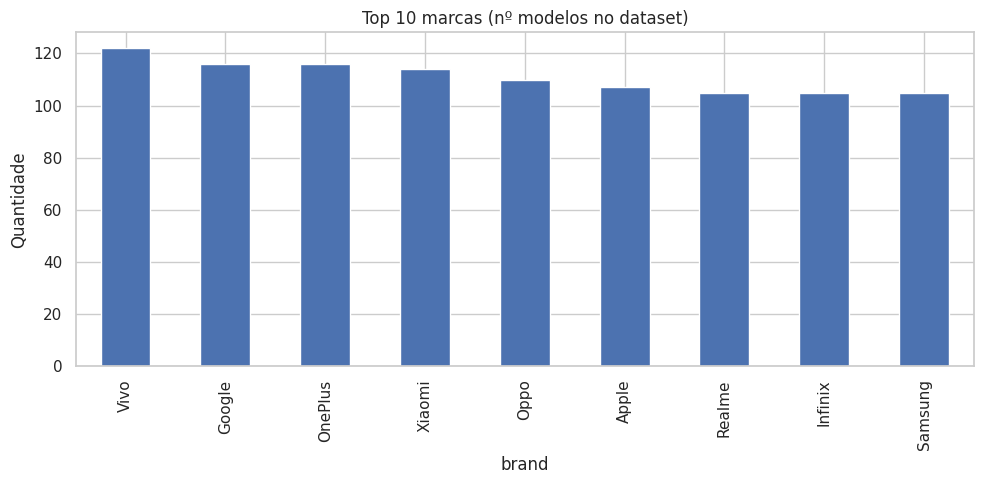

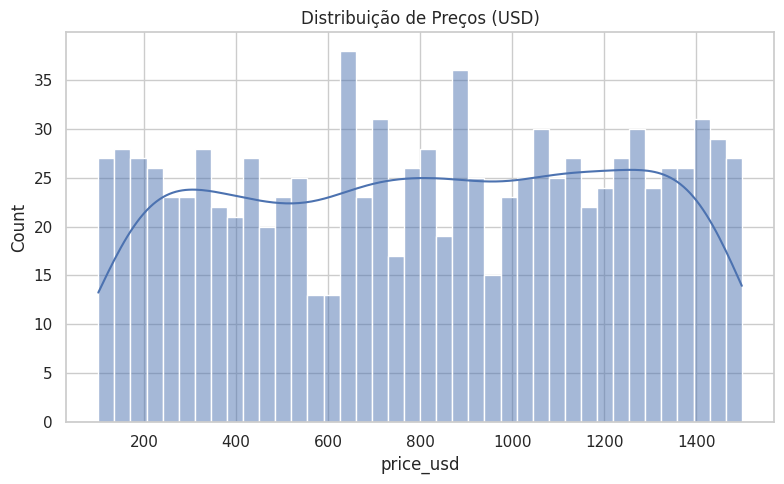

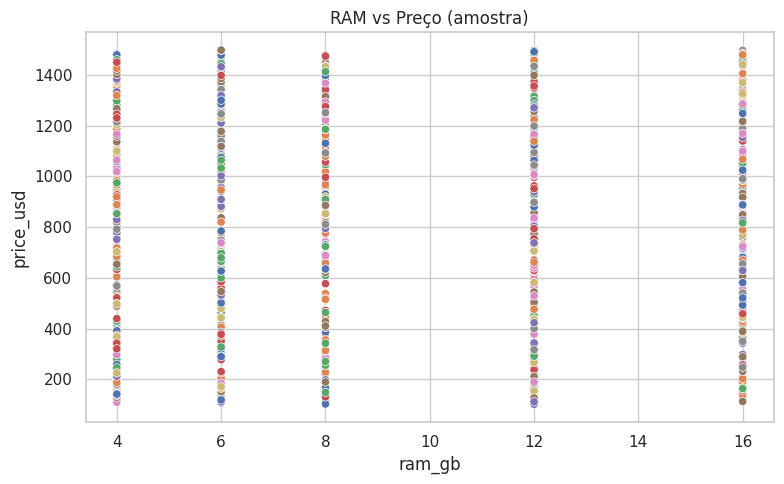

In [6]:
# 6) Visualizações (salva em /content/figs)
plt.figure(figsize=(10,5))
top_brands.plot(kind='bar')
plt.title("Top 10 marcas (nº modelos no dataset)")
plt.ylabel("Quantidade")
plt.tight_layout()
plt.savefig('/content/figs/top_brands.png', dpi=150)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['price_usd'], bins=40, kde=True)
plt.title("Distribuição de Preços (USD)")
plt.xlabel("price_usd")
plt.tight_layout()
plt.savefig('/content/figs/price_dist.png', dpi=150)
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df.sample(min(1000,len(df))), x='ram_gb', y='price_usd', hue='brand', legend=False)
plt.title("RAM vs Preço (amostra)")
plt.tight_layout()
plt.savefig('/content/figs/ram_price_scatter.png', dpi=150)
plt.show()

In [7]:
# 7) Preparar features para clustering (ML)
# Selecionar features numéricas relevantes (combinação de colunas existentes)
features = ['price_usd','ram_gb','storage_gb','camera_mp','battery_mah',
            'display_size_inch','charging_watt','rating','support_5g',
            'price_per_ram','price_per_storage','value_index','battery_cost_ratio','year']

# Filtrar apenas as que existem (safety)
features = [f for f in features if f in df.columns]
print("Features usadas para clustering:", features)

X = df[features].copy()

# Escalonar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Features usadas para clustering: ['price_usd', 'ram_gb', 'storage_gb', 'camera_mp', 'battery_mah', 'display_size_inch', 'charging_watt', 'rating', 'support_5g', 'price_per_ram', 'price_per_storage', 'value_index', 'battery_cost_ratio', 'year']


In [8]:
# 8) PCA para visualização 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio (PCA 2):", pca.explained_variance_ratio_)
df['pca1'] = X_pca[:,0]
df['pca2'] = X_pca[:,1]

Explained variance ratio (PCA 2): [0.2646616 0.116485 ]


In [9]:
# 9) Aplicar 2 algoritmos de clustering (KMeans e Agglomerative)
# KMeans (exemplo com k=3, você pode testar k variando)
k = 3

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
k_labels = kmeans.fit_predict(X_scaled)

agg = AgglomerativeClustering(n_clusters=k)
agg_labels = agg.fit_predict(X_scaled)

# Métricas de comparação
k_sil = silhouette_score(X_scaled, k_labels)
k_db = davies_bouldin_score(X_scaled, k_labels)

agg_sil = silhouette_score(X_scaled, agg_labels)
agg_db = davies_bouldin_score(X_scaled, agg_labels)

print(f"KMeans  -> silhouette: {k_sil:.4f}, davies_bouldin: {k_db:.4f}")
print(f"Agglom. -> silhouette: {agg_sil:.4f}, davies_bouldin: {agg_db:.4f}")

# Anexar labels ao df
df['cluster_km'] = k_labels
df['cluster_agg'] = agg_labels

KMeans  -> silhouette: 0.1217, davies_bouldin: 2.3007
Agglom. -> silhouette: 0.0893, davies_bouldin: 2.5810


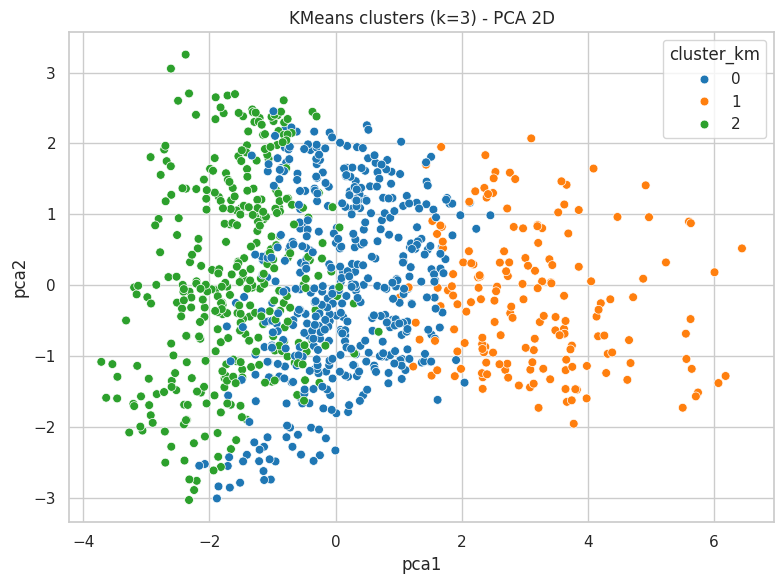

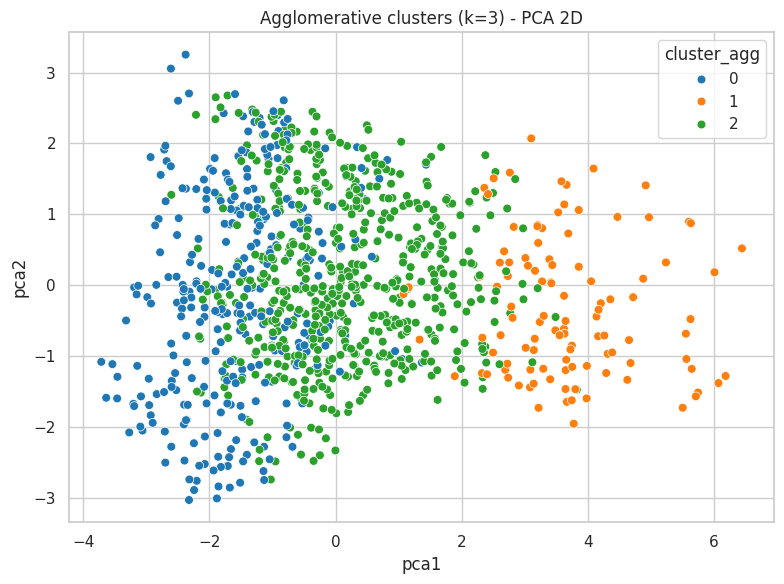

In [10]:
# 10) Visualizar clusters em PCA 2D
plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_km', palette='tab10', data=df, s=40)
plt.title(f'KMeans clusters (k={k}) - PCA 2D')
plt.tight_layout()
plt.savefig('/content/figs/clusters_kmeans_pca.png', dpi=150)
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_agg', palette='tab10', data=df, s=40)
plt.title(f'Agglomerative clusters (k={k}) - PCA 2D')
plt.tight_layout()
plt.savefig('/content/figs/clusters_agg_pca.png', dpi=150)
plt.show()

In [11]:
# 11) Sumários por cluster (insights)
print("Médias das features por cluster (KMeans):")
display(df.groupby('cluster_km')[features].mean().T)

print("Contagem por cluster (KMeans):")
display(df['cluster_km'].value_counts().sort_index())

# Exemplo: top modelos por value_index em cada cluster
for c in sorted(df['cluster_km'].unique()):
    print(f"\nCluster KMeans {c} - top 5 value_index")
    display(df[df['cluster_km']==c].sort_values('value_index', ascending=False).head(5)[['brand','model','price_usd','rating','value_index']])

Médias das features por cluster (KMeans):


cluster_km,0,1,2
price_usd,794.331210,217.808140,1125.728291
ram_gb,11.719745,8.813953,5.983193
storage_gb,455.745223,402.976744,333.086835
camera_mp,82.828025,82.651163,84.890756
battery_mah,4939.490446,5180.232558,5026.610644
display_size_inch,6.361146,6.393605,6.400000
charging_watt,64.295117,62.058140,63.960784
rating,4.182590,4.299419,4.258824
support_5g,0.507431,0.529070,0.484594
price_per_ram,72.899770,31.190649,206.191293


Contagem por cluster (KMeans):


,count
cluster_km,
0,471
1,172
2,357



Cluster KMeans 0 - top 5 value_index


,brand,model,price_usd,rating,value_index
2,Xiaomi,Redmi Note 14 Pro 461,258.0,4.1,0.015891
572,Realme,C65 668,298.0,4.5,0.015101
311,Xiaomi,Poco F6 439,256.0,3.7,0.014453
125,Oppo,Reno 12 808,316.0,4.5,0.014241
126,Xiaomi,Poco F6 756,350.0,4.6,0.013143



Cluster KMeans 1 - top 5 value_index


,brand,model,price_usd,rating,value_index
186,Xiaomi,Mi 14 462,105.0,4.8,0.045714
199,Realme,GT 7 Pro 382,111.0,5.0,0.045045
77,Oppo,Reno 11 265,102.0,4.4,0.043137
922,Oppo,Reno 12 350,118.0,5.0,0.042373
645,Google,Pixel 7a 59,122.0,5.0,0.040984



Cluster KMeans 2 - top 5 value_index


,brand,model,price_usd,rating,value_index
978,Xiaomi,Poco F6 680,439.0,5.0,0.011390
443,Vivo,Y100A 418,498.0,4.8,0.009639
447,Xiaomi,Mi 14 928,521.0,4.7,0.009021
524,Vivo,Y200 311,497.0,4.3,0.008652
55,Samsung,Galaxy M55 286,568.0,4.6,0.008099


In [12]:
# 12) Salvar dataset com clusters e as figuras (para apresentação / GitHub)
df.to_csv('/content/smartphones_with_clusters.csv', index=False)
print("CSV com clusters salvo em /content/smartphones_with_clusters.csv")

# Listar figuras salvas
print("\nFiguras salvas:")
for f in os.listdir('/content/figs'):
    print(f, "-> /content/figs/" + f)

CSV com clusters salvo em /content/smartphones_with_clusters.csv

Figuras salvas:
clusters_kmeans_pca.png -> /content/figs/clusters_kmeans_pca.png
top_brands.png -> /content/figs/top_brands.png
clusters_agg_pca.png -> /content/figs/clusters_agg_pca.png
ram_price_scatter.png -> /content/figs/ram_price_scatter.png
price_dist.png -> /content/figs/price_dist.png


In [13]:
# 13) Gerar PPTX simples com os gráficos (python-pptx)
!pip install python-pptx --quiet

from pptx import Presentation
from pptx.util import Inches

prs = Presentation()
# Slide título
slide = prs.slides.add_slide(prs.slide_layouts[0])
slide.shapes.title.text = "World Smartphone Market 2025 - Análise"
slide.placeholders[1].text = "EDA, pré-processamento, clustering (KMeans x Agglomerative)\nSeu nome - Data"

# Slide: distribuição de preços
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Distribuição de Preços"
img_path = "/content/figs/price_dist.png"
if os.path.exists(img_path):
    slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide: top brands
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Top Brands"
img_path = "/content/figs/top_brands.png"
if os.path.exists(img_path):
    slide.shapes.add_picture(img_path, Inches(1), Inches(1.5), width=Inches(8))

# Slide: clusters KMeans
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Clusters - KMeans (PCA)"
img_path = "/content/figs/clusters_kmeans_pca.png"
if os.path.exists(img_path):
    slide.shapes.add_picture(img_path, Inches(1), Inches(1.2), width=Inches(8))

# Slide: clusters Agglomerative
slide = prs.slides.add_slide(prs.slide_layouts[5])
slide.shapes.title.text = "Clusters - Agglomerative (PCA)"
img_path = "/content/figs/clusters_agg_pca.png"
if os.path.exists(img_path):
    slide.shapes.add_picture(img_path, Inches(1), Inches(1.2), width=Inches(8))

outppt = "/content/World_Smartphone_Analysis.pptx"
prs.save(outppt)
print("PPTX salvo em", outppt)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 14.7 MB/s eta 0:00:00
PPTX salvo em /content/World_Smartphone_Analysis.pptx


In [14]:
# 14) Instruções rápidas para entrega (salvar / baixar)
# Para baixar do Colab:
# - Vá no painel lateral Files -> clique com o botão direito em World_Smartphone_Analysis.pptx -> Download
# - Ou execute:
from google.colab import files
files.download('/content/World_Smartphone_Analysis.pptx')    # faz download do pptx
files.download('/content/smartphones_with_clusters.csv')    # faz download do csv com clusters

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>